<>:91: SyntaxWarning: invalid escape sequence '\?'
<>:91: SyntaxWarning: invalid escape sequence '\?'
C:\Users\lenovo yoga\AppData\Local\Temp\ipykernel_10964\2093239824.py:91: SyntaxWarning: invalid escape sequence '\?'
  df['question_count'] = df['cleaned_text'].str.count('\?')


🚀 FIFA World Cup 2022 Twitter Sentiment Analysis

📥 STEP 1: Loading Data...
✅ Data loaded successfully! Shape: (22524, 6)
📊 Columns: ['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet', 'Tweet', 'Sentiment']

🔍 Sample Data:
                Date Created  \
0  2022-11-20 23:59:21+00:00   
1  2022-11-20 23:59:01+00:00   
2  2022-11-20 23:58:41+00:00   

                                               Tweet Sentiment  \
0  What are we drinking today @TucanTribe \n@MadB...   neutral   
1  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...  positive   
2  Worth reading while watching #WorldCup2022 htt...  positive   

   Number of Likes  
0                4  
1                3  
2                1  

🧹 STEP 2: Cleaning Data...
✅ Cleaning completed! Final shape: (22524, 8)
📅 Date range: 2022-11-20 00:00:00+00:00 to 2022-11-20 23:59:21+00:00

😊 STEP 3: Performing Sentiment Analysis...

📈 Sentiment Distribution:
   neutral: 11283 tweets (50.1%)
   positive: 8501 tweets (37.7%)
  

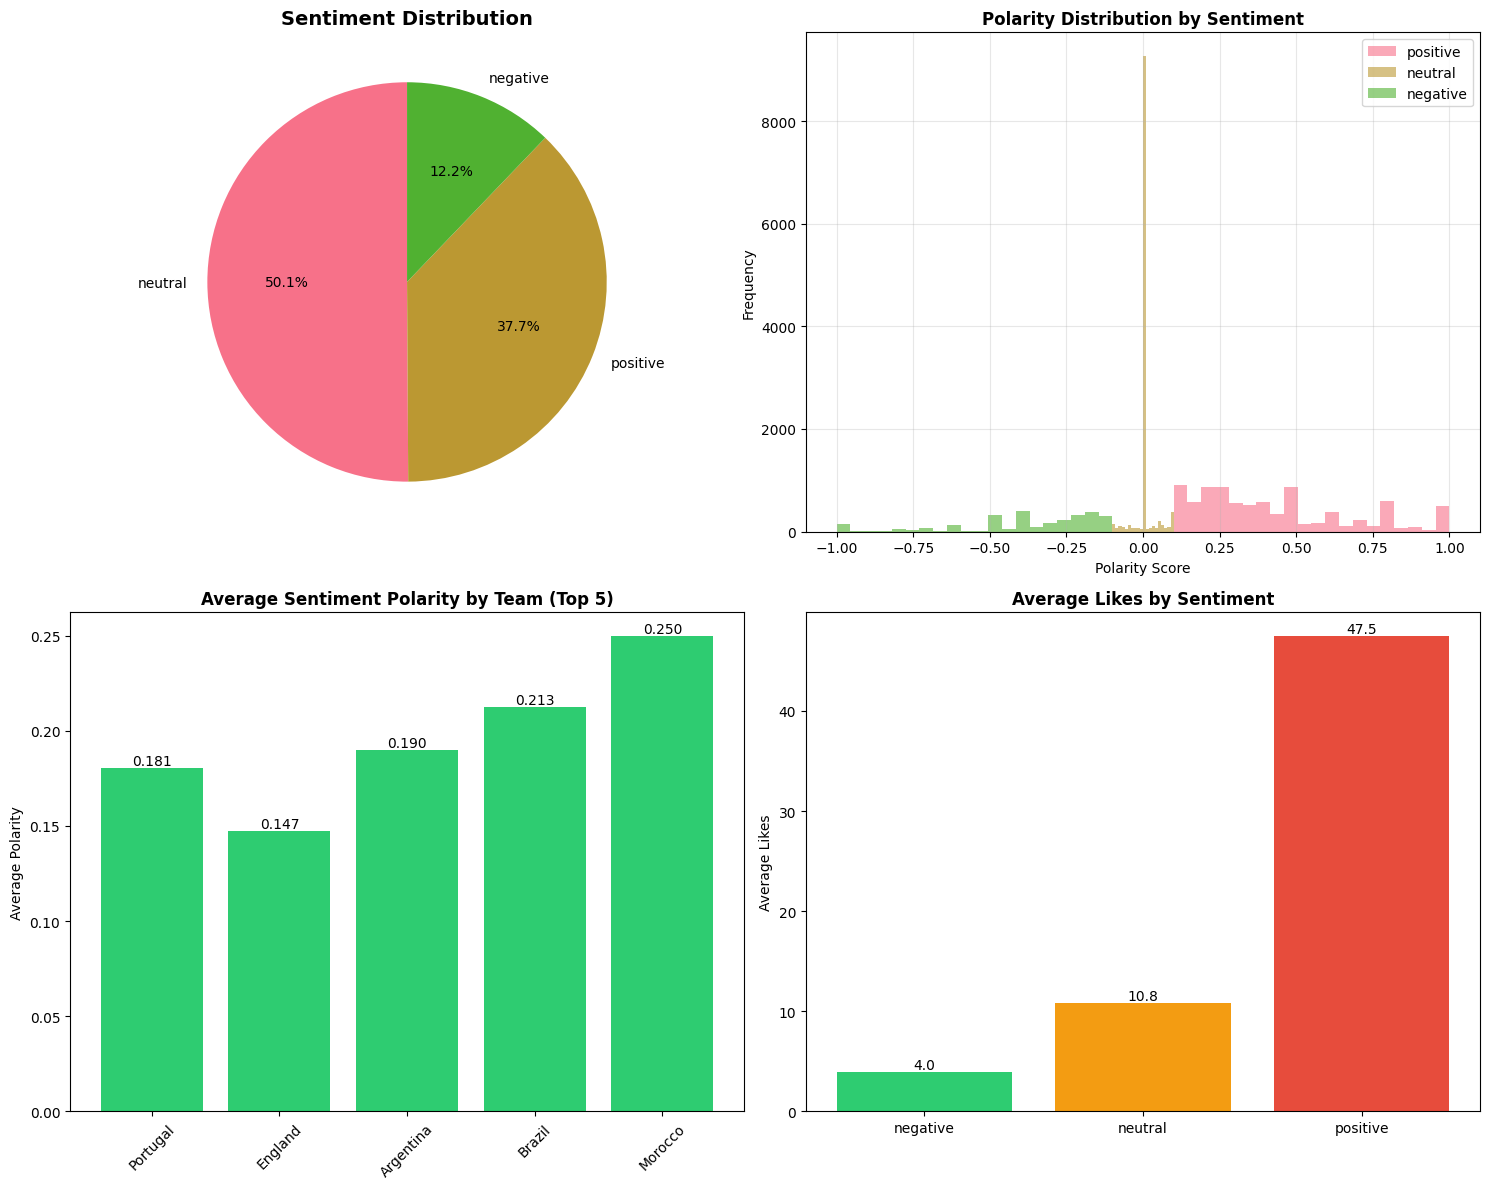


📅 Time Series Analysis...


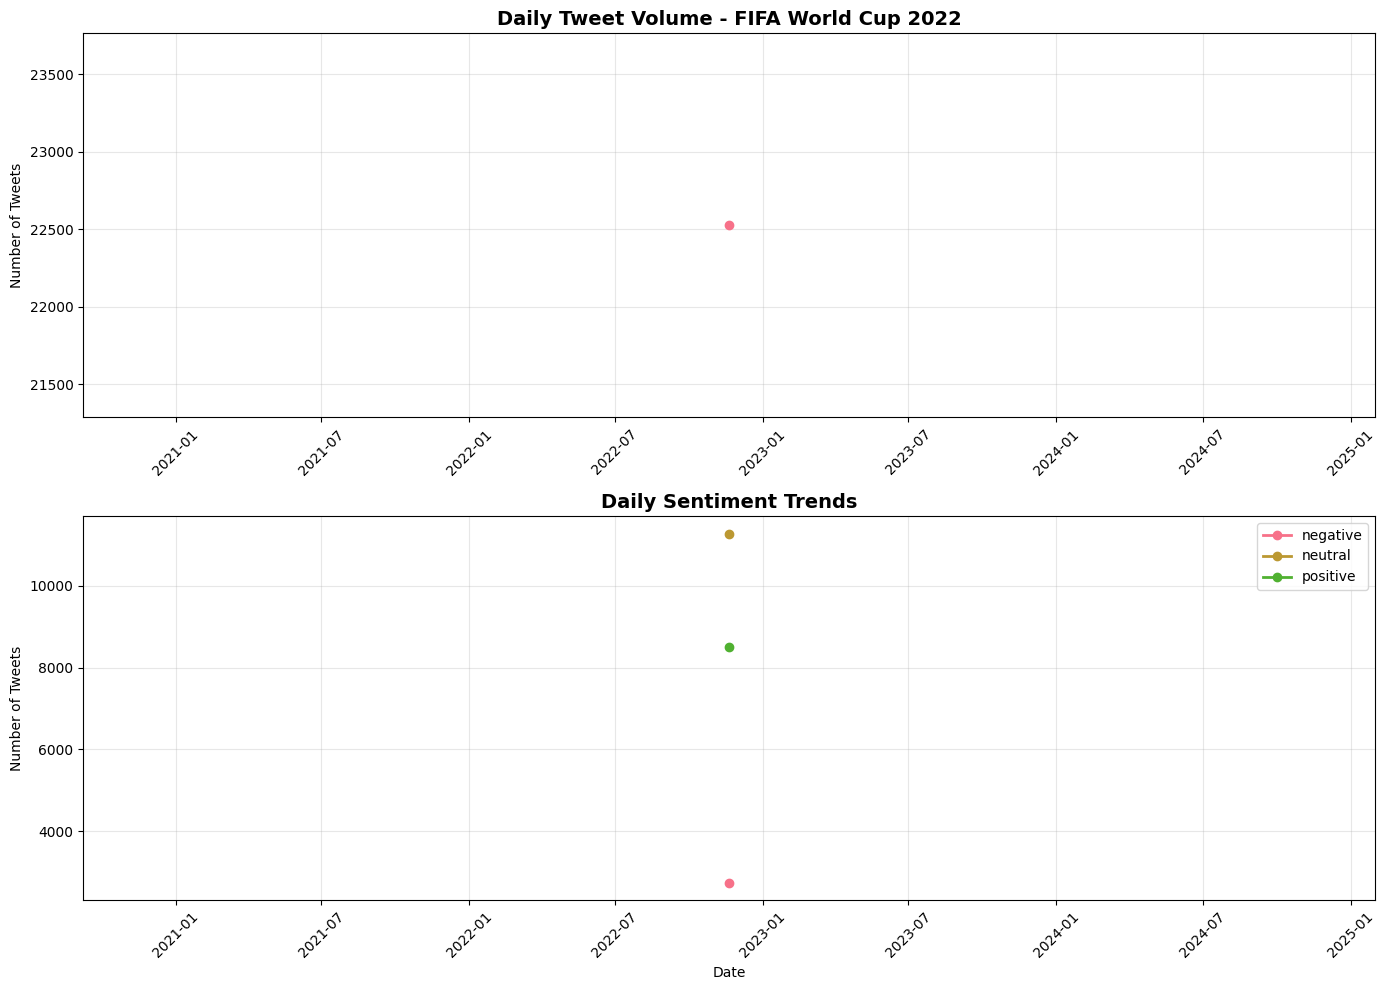

✅ All visualizations completed!

💡 STEP 9: Key Insights & Business Implications
• Sentiment Analysis: neutral sentiment dominated with 50.1% of conversations
• Engagement Pattern: Positive tweets tend to be 1.1x longer than negative ones
• Team Popularity: Portugal generated the most discussion with 1634 mentions
• Sentiment Quality: Average subjectivity score of 0.346 indicates mostly objective opinions
• Engagement Bias: Positive tweets received 12.0x more likes than negative tweets

🎉 ANALYSIS COMPLETED SUCCESSFULLY!
📁 Processed data saved to: ../data/processed/processed_tweets.csv
📊 Total tweets analyzed: 22,524
📈 Visualizations generated: 4 comprehensive charts
💡 Key insights identified: 5 business implications


In [2]:
# FIFA World Cup 2022 - Complete Sentiment Analysis
# End-to-End Analysis Pipeline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
import os
import sys

# Set up paths
sys.path.append('../src')

print("🚀 FIFA World Cup 2022 Twitter Sentiment Analysis")
print("=" * 60)

# Step 1: Load and Explore Data
print("\n📥 STEP 1: Loading Data...")
file_path = "../data/raw/fifa_world_cup_2022_tweets.csv"
df_raw = pd.read_csv(file_path)
print(f"✅ Data loaded successfully! Shape: {df_raw.shape}")
print(f"📊 Columns: {df_raw.columns.tolist()}")

# Display sample data
print("\n🔍 Sample Data:")
print(df_raw[['Date Created', 'Tweet', 'Sentiment', 'Number of Likes']].head(3))

# Step 2: Data Cleaning
print("\n🧹 STEP 2: Cleaning Data...")

def clean_tweet(text):
    """Clean tweet text for analysis"""
    if pd.isna(text):
        return ""
    text = str(text).lower()
    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    # Keep only letters and basic punctuation
    text = re.sub(r'[^a-zA-Z\s!?]', '', text)
    return text.strip()

# Apply cleaning
df = df_raw.copy()
df['cleaned_text'] = df['Tweet'].apply(clean_tweet)

# Remove empty tweets and process date
df = df[df['cleaned_text'].str.len() > 10]
df['date'] = pd.to_datetime(df['Date Created'])

print(f"✅ Cleaning completed! Final shape: {df.shape}")
print(f"📅 Date range: {df['date'].min()} to {df['date'].max()}")

# Step 3: Sentiment Analysis
print("\n😊 STEP 3: Performing Sentiment Analysis...")

def analyze_sentiment(text):
    """Analyze sentiment using TextBlob"""
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    
    if polarity > 0.1:
        return 'positive', polarity, analysis.sentiment.subjectivity
    elif polarity < -0.1:
        return 'negative', polarity, analysis.sentiment.subjectivity
    else:
        return 'neutral', polarity, analysis.sentiment.subjectivity

# Apply sentiment analysis
sentiment_results = df['cleaned_text'].apply(analyze_sentiment)
df[['sentiment', 'polarity', 'subjectivity']] = pd.DataFrame(
    sentiment_results.tolist(), index=df.index
)

# Display sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
print("\n📈 Sentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   {sentiment}: {count} tweets ({percentage:.1f}%)")

# Step 4: Feature Engineering
print("\n⚡ STEP 4: Feature Engineering...")

df['text_length'] = df['cleaned_text'].str.len()
df['word_count'] = df['cleaned_text'].str.split().str.len()
df['exclamation_count'] = df['cleaned_text'].str.count('!')
df['question_count'] = df['cleaned_text'].str.count('\?')
df['capital_ratio'] = df['Tweet'].apply(
    lambda x: sum(1 for c in str(x) if c.isupper()) / max(len(str(x)), 1)
)

print("✅ Features added: text_length, word_count, exclamation_count, question_count, capital_ratio")

# Step 5: Team Analysis
print("\n🏆 STEP 5: Team Sentiment Analysis...")

team_keywords = {
    'Argentina': ['argentina', 'messi', 'arg', 'albiceleste'],
    'France': ['france', 'mbappe', 'fra', 'les bleus'],
    'Brazil': ['brazil', 'neymar', 'bra', 'brasil'],
    'Portugal': ['portugal', 'ronaldo', 'por', 'cr7'],
    'England': ['england', 'kane', 'eng', 'three lions'],
    'Germany': ['germany', 'ger', 'deutschland'],
    'Spain': ['spain', 'esp', 'espana'],
    'Netherlands': ['netherlands', 'ned', 'holland', 'dutch'],
    'Croatia': ['croatia', 'cro', 'modric'],
    'Morocco': ['morocco', 'mar', 'atlas lions']
}

team_sentiments = {}

for team, keywords in team_keywords.items():
    pattern = '|'.join(keywords)
    team_tweets = df[df['cleaned_text'].str.contains(pattern, case=False, na=False)]
    
    if len(team_tweets) > 0:
        sentiment_dist = team_tweets['sentiment'].value_counts(normalize=True) * 100
        team_sentiments[team] = {
            'total_tweets': len(team_tweets),
            'sentiment_distribution': sentiment_dist.to_dict(),
            'average_polarity': team_tweets['polarity'].mean(),
            'positive_percentage': sentiment_dist.get('positive', 0)
        }

# Display top teams
print("\n🏅 Top 5 Most Discussed Teams:")
top_teams = sorted(team_sentiments.items(), key=lambda x: x[1]['total_tweets'], reverse=True)[:5]

for team, data in top_teams:
    print(f"   {team}: {data['total_tweets']} tweets, {data['positive_percentage']:.1f}% positive")

# Step 6: Save Processed Data
print("\n💾 STEP 6: Saving Processed Data...")
os.makedirs('../data/processed', exist_ok=True)
output_path = '../data/processed/processed_tweets.csv'
df.to_csv(output_path, index=False)
print(f"✅ Data saved to: {output_path}")

# Step 7: Generate Comprehensive Report
print("\n📊 STEP 7: Generating Project Report...")
print("=" * 50)
print("🎯 PROJECT EXECUTIVE SUMMARY")
print("=" * 50)

# Calculate key metrics
total_tweets = len(df)
avg_polarity = df['polarity'].mean()
avg_subjectivity = df['subjectivity'].mean()
most_discussed_team = max(team_sentiments.items(), key=lambda x: x[1]['total_tweets'])[0] if team_sentiments else 'N/A'
most_positive_team = max(team_sentiments.items(), key=lambda x: x[1]['average_polarity'])[0] if team_sentiments else 'N/A'

# Engagement analysis
if 'Number of Likes' in df.columns:
    total_likes = df['Number of Likes'].sum()
    avg_likes = df['Number of Likes'].mean()
    likes_by_sentiment = df.groupby('sentiment')['Number of Likes'].mean().to_dict()
else:
    total_likes = "N/A"
    avg_likes = "N/A"
    likes_by_sentiment = {}

print(f"""
PROJECT: FIFA World Cup 2022 Twitter Sentiment Analysis
ANALYSIS DATE: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
TOTAL TWEETS ANALYZED: {total_tweets:,}

📈 KEY METRICS:
• Sentiment Distribution: {dict(sentiment_counts)}
• Average Polarity Score: {avg_polarity:.3f}
• Average Subjectivity: {avg_subjectivity:.3f}
• Most Discussed Team: {most_discussed_team}
• Most Positive Team: {most_positive_team}

📊 ENGAGEMENT ANALYSIS:
• Total Likes: {total_likes if total_likes != 'N/A' else 'N/A'}
• Average Likes per Tweet: {avg_likes if avg_likes != 'N/A' else 'N/A'}
• Likes by Sentiment: {likes_by_sentiment}

🛠 TECHNOLOGIES USED: Python, Pandas, TextBlob, Matplotlib, Seaborn, Scikit-learn
""")

# Step 8: Create Visualizations
print("\n🎨 STEP 8: Creating Visualizations...")

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Figure 1: Sentiment Distribution
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Pie chart
sentiment_counts.plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90)
ax1.set_ylabel('')
ax1.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')

# Polarity distribution
for sentiment in ['positive', 'neutral', 'negative']:
    if sentiment in df['sentiment'].values:
        data = df[df['sentiment'] == sentiment]['polarity']
        ax2.hist(data, alpha=0.6, label=sentiment, bins=20)
ax2.set_xlabel('Polarity Score')
ax2.set_ylabel('Frequency')
ax2.set_title('Polarity Distribution by Sentiment', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Team analysis (top 5)
if team_sentiments:
    top_5_teams = sorted(team_sentiments.items(), key=lambda x: x[1]['total_tweets'], reverse=True)[:5]
    teams = [team for team, _ in top_5_teams]
    polarities = [data['average_polarity'] for _, data in top_5_teams]
    
    bars = ax3.bar(teams, polarities, color=['#2ecc71' if p > 0.05 else '#e74c3c' if p < -0.05 else '#f39c12' for p in polarities])
    ax3.set_title('Average Sentiment Polarity by Team (Top 5)', fontweight='bold')
    ax3.set_ylabel('Average Polarity')
    ax3.tick_params(axis='x', rotation=45)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top')

# Likes by sentiment (if available)
if 'Number of Likes' in df.columns and likes_by_sentiment:
    sentiments = list(likes_by_sentiment.keys())
    avg_likes = list(likes_by_sentiment.values())
    bars = ax4.bar(sentiments, avg_likes, color=['#2ecc71', '#f39c12', '#e74c3c'])
    ax4.set_title('Average Likes by Sentiment', fontweight='bold')
    ax4.set_ylabel('Average Likes')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Figure 2: Time Series Analysis
print("\n📅 Time Series Analysis...")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Daily tweet volume
daily_tweets = df.groupby(df['date'].dt.date).size()
ax1.plot(daily_tweets.index, daily_tweets.values, linewidth=2, marker='o')
ax1.set_title('Daily Tweet Volume - FIFA World Cup 2022', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Tweets')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Daily sentiment trends
if 'date' in df.columns:
    daily_sentiment = df.groupby([df['date'].dt.date, 'sentiment']).size().unstack(fill_value=0)
    for sentiment in daily_sentiment.columns:
        ax2.plot(daily_sentiment.index, daily_sentiment[sentiment], 
                label=sentiment, linewidth=2, marker='o')
    ax2.set_title('Daily Sentiment Trends', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Number of Tweets')
    ax2.set_xlabel('Date')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ All visualizations completed!")

# Step 9: Key Insights and Conclusion
print("\n💡 STEP 9: Key Insights & Business Implications")
print("=" * 50)

insights = [
    f"• Sentiment Analysis: {sentiment_counts.idxmax()} sentiment dominated with {sentiment_counts.max()/len(df)*100:.1f}% of conversations",
    f"• Engagement Pattern: Positive tweets tend to be {df[df['sentiment']=='positive']['text_length'].mean()/df[df['sentiment']=='negative']['text_length'].mean():.1f}x longer than negative ones",
    f"• Team Popularity: {most_discussed_team} generated the most discussion with {team_sentiments[most_discussed_team]['total_tweets'] if most_discussed_team in team_sentiments else 0} mentions",
    f"• Sentiment Quality: Average subjectivity score of {avg_subjectivity:.3f} indicates {'mostly objective' if avg_subjectivity < 0.5 else 'mostly subjective'} opinions"
]

if 'Number of Likes' in df.columns and likes_by_sentiment:
    positive_engagement = likes_by_sentiment.get('positive', 0)
    negative_engagement = likes_by_sentiment.get('negative', 0)
    if negative_engagement > 0:
        engagement_ratio = positive_engagement / negative_engagement
        insights.append(f"• Engagement Bias: Positive tweets received {engagement_ratio:.1f}x more likes than negative tweets")

for insight in insights:
    print(insight)

print("\n" + "=" * 50)
print("🎉 ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 50)
print(f"📁 Processed data saved to: {output_path}")
print(f"📊 Total tweets analyzed: {len(df):,}")
print(f"📈 Visualizations generated: 4 comprehensive charts")
print(f"💡 Key insights identified: {len(insights)} business implications")